In [4]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:

results = {}

for fn in os.listdir('task-sim-result/hop'):
    with open(os.path.join('task-sim-result/hop', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        hop_file = lines[0]
        
        res = [float(tmp.split('\t')[-1]) for tmp in lines[2::2]][:100]
        
        if hop_file in results.keys():
            results[hop_file].append(res)
        else:
            results[hop_file] = [res]

for fn in os.listdir('task-sim-result/layer'):
    with open(os.path.join('task-sim-result/layer', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        hop_file = lines[0]
        
        res = [float(tmp.split('\t')[-1]) for tmp in lines[2::2]][:100]

        if hop_file in results.keys():
            results[hop_file].append(res)
        else:
            results[hop_file] = [res]
            
            
results11 = {}

for fn in os.listdir('task-sim-result/mfea11'):
    with open(os.path.join('task-sim-result/mfea11', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        for i in range(len(tasks)):
            values = [float(tmp.split('\t')[-1]) for tmp in lines[i+2::3]][:100]
            if tasks[i] in results11.keys():
                results11[tasks[i]].append(values)
            else:
                results11[tasks[i]] = [values]
            
results13 = {}

for fn in os.listdir('task-sim-result/mfea13'):
    with open(os.path.join('task-sim-result/mfea13', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        for i in range(len(tasks)):
            values = [float(tmp.split('\t')[-1]) for tmp in lines[i+2::5]][:100]
            if tasks[i] in results13.keys():
                results13[tasks[i]].append(values)
            else:
                results13[tasks[i]] = [values]


results31 = {}

for fn in os.listdir('task-sim-result/mfea31'):
    with open(os.path.join('task-sim-result/mfea31', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        for i in range(len(tasks)):
            values = [float(tmp.split('\t')[-1]) for tmp in lines[i+2::5]][:100]
            if tasks[i] in results31.keys():
                results31[tasks[i]].append(values)
            else:
                results31[tasks[i]] = [values]



results33 = {}

for fn in os.listdir('task-sim-result/mfea33'):
    with open(os.path.join('task-sim-result/mfea33', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        for i in range(len(tasks)):
            values = [float(tmp.split('\t')[-1]) for tmp in lines[i+2::7]][:100]
            if tasks[i] in results33.keys():
                results33[tasks[i]].append(values)
            else:
                results33[tasks[i]] = [values]                


In [61]:
# from numpy import inf
# def eraseinf(li):
#     na = np.array(li)
#     rep = np.min(na, axis=0)
#     m, n = na.shape

#     for i in range(m):
#         for j in range(n):
#             if na[i,j] > 1e8:
#                 na[i,j] = rep[j,]
#     return na
    
# for k in results.keys():
#     results[k] = eraseinf(results[k])

# for k in results2.keys():
#     results2[k] = eraseinf(results2[k])

# for k in results13.keys():
#     results13[k] = eraseinf(results13[k])
    
# for k in results31.keys():
#     results31[k] = eraseinf(results31[k])

# for k in results6.keys():
#     results6[k] = eraseinf(results6[k])

In [2]:
import os
from numpy import inf

res = [results, results11, results13, results31, results33]

def plot(test):
    global res
    data = [np.array(tmp[test]) for tmp in res]
    data = np.array([np.mean(tmp, axis=0) for tmp in data])
    data[data == inf] = -1
    max_val = np.max(data)
    data[data == -1] = inf
    min_val = np.min(data)
    
    
    print(max_val, min_val)
    data = (data-min_val)/(max_val-min_val)
    
    plt.rcParams.update({'font.size': 12, 'font.weight': 600, 'axes.titlesize': 12, 
                     'axes.labelsize': 'large', 'axes.labelweight': 'bold',
                     'legend.fontsize': 'medium',
                     'boxplot.boxprops.linewidth' : 2,
                     'legend.numpoints': 1
                    })

    idx = 4
    
    if len(test.split('_')) == 4:
        label = ['$ST_{m}$', '$MT_{1s-1m} (m)$', '$MT_{1s-3m} (m)$', '$MT_{3s-1m} (m)$', '$MT_{3s-3m} (m)$']
    else:
        label = ['$ST_{s}$', '$MT_{1s-1m} (s)$', '$MT_{1s-3m} (s)$', '$MT_{3s-1m} (s)$', '$MT_{3s-3m} (s)$']
        
    plt.plot(data[0], '^-', linewidth=1.5, markevery=9, markersize=5, label=label[0])
    plt.plot(data[1], 'o-', linewidth=1.5, markevery=9, markersize=5, label=label[1])
    plt.plot(data[2], 'X-', linewidth=1.5, markevery=9, markersize=5, label=label[2])
    plt.plot(data[3], '*-', linewidth=1.5, markevery=9, markersize=5, label=label[3])
    plt.plot(data[4], 'D-', linewidth=1.5, markevery=9, markersize=5, label=label[4])

    plt.gca().yaxis.grid(True)
    plt.xlabel('Generations')
    plt.ylabel('Normalized fitness value')
    plt.legend(prop={})
    
    plt.savefig(f'figs/{test}.jpg')
    plt.clf()

    
for t in results.keys():
    print(t)
    plot(t)
#     break

no-dem5_r25_1_0.json
0.0023059534040711744 0.0014759537392862328
no-dem10_r25_1_0.json
0.002174237967822811 0.001640824940833135
uu-dem7_r50_1_0.json
0.002091604084264404 0.0015215728334133122
ga-dem8_r25_1_0.json
0.002681022809097068 0.001360846396149955
no-dem1_r25_1_0.json
0.0024570531057473257 0.0014809326128059988
uu-dem3_r50_1_0.json
0.002281455994360921 0.0015856446503118144
uu-dem8_r25_1_0.json
0.0021610595854178708 0.0015209195400836424
no-dem2_r25_1_0.json
0.0024008951074153072 0.0014808812931580578
no-dem6_r25_1_0.json
0.002360832915889284 0.0015208952317783784
uu-dem4_r50_1_0.json
0.002401061184074723 0.0015816637624113208
uu-dem1_r25_1_0.json
0.002401030937003313 0.001555180787823788
ga-dem2_r25_1_0.json
0.002565064004878972 0.0016809385286367558
no-dem8_r25_1_0.json
0.002301008421304726 0.001560775998546189
uu-dem5_r25_1_0.json
0.0022009743908868113 0.0014409136770500313
ga-dem6_r25_1_0.json
0.003041035424989037 0.001800886856983059
uu-dem10_r25_1_40.json
0.00536133711152

<Figure size 432x288 with 0 Axes>

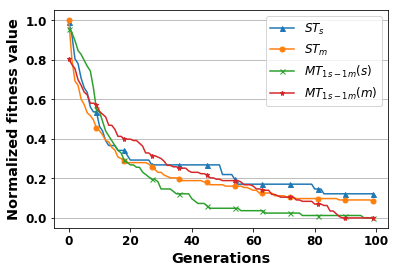

In [22]:
values = [[[0.9067143889827778, 0.6355857217587056, 0.5847203564591518, 0.4323058365139189, 0.4153475173794405, 0.33054283079404645, 0.3304916043652883, 0.29664622787755424, 0.2458103774290548, 0.24580435867209138, 0.22887253572901536, 0.22887253572901536, 0.22885600764761885, 0.22884281098254386, 0.22884281098254386, 0.21188425393352947, 0.21188425393352947, 0.21187118445689784, 0.21187118445689784, 0.21187118445689784, 0.21187118445689784, 0.21187118445689784, 0.21185544329519976, 0.21185544329519976, 0.21185544329519976, 0.21182857226583388, 0.1949116130817587, 0.1949016485647524, 0.1949016485647524, 0.19487837306357927, 0.19487837306357927, 0.17796174647477433, 0.17796174647477433, 0.17796174647477433, 0.17796174647477433, 0.17796174647477433, 0.17796174647477433, 0.17795945037355418, 0.17795945037355418, 0.1779301087870552, 0.1779301087870552, 0.14411389152939547, 0.14410651331612198, 0.14410651331612198, 0.14410651331612198, 0.12715816229164945, 0.12715816229164945, 0.1102415357028445, 0.09331646017954509, 0.09331646017954509, 0.09331646017954509, 0.09331257635662421, 0.09331257635662421, 0.09331257635662421, 0.09331257635662421, 0.09329150081997654, 0.09329150081997654, 0.09329150081997654, 0.09329150081997654, 0.09329150081997654, 0.07637257812995162, 0.07637257812995162, 0.07637257812995162, 0.07637257812995162, 0.07636290381545799, 0.07636290381545799, 0.07636290381545799, 0.07636290381545799, 0.07636290381545799, 0.07636290381545799, 0.07636290381545799, 0.07636290381545799, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.07635269779091633, 0.05941524733029844, 0.05941524733029844, 0.05941524733029844, 0.059402276406469896],
            [0.8730130544853448, 0.8095513178012764, 0.7619088962654388, 0.7460390231136884, 0.5874210860513929, 0.5715437460594536, 0.5397458611426926, 0.4920797706300303, 0.4920342741924455, 0.47618265422884354, 0.46030222136234145, 0.4602752499412377, 0.46026135553666087, 0.42857768538101493, 0.42857768538101493, 0.412685012646444, 0.412685012646444, 0.41267689374013394, 0.41267689374013394, 0.41267689374013394, 0.41267689374013394, 0.4126675623146971, 0.412657879506241, 0.412657879506241, 0.34918178086662016, 0.34918178086662016, 0.34918178086662016, 0.34916781002822556, 0.34916781002822556, 0.33330563976104444, 0.33329518673764535, 0.31742208854631354, 0.3174068420213359, 0.3174068420213359, 0.3174026157075541, 0.3015206844430461, 0.30151877924616344, 0.28566438659055576, 0.28566438659055576, 0.28566438659055576, 0.28564914006557834, 0.28564914006557834, 0.28564914006557834, 0.28564914006557834, 0.28564914006557834, 0.28564914006557834, 0.28564914006557834, 0.28564723486869564, 0.28564723486869564, 0.2856456810548323, 0.2856456810548323, 0.2697912883992246, 0.2697912883992246, 0.2697912883992246, 0.2697912883992246, 0.2697912883992246, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2697741366773645, 0.2539119237253336, 0.2539119237253336, 0.2539119237253336, 0.2539119237253336, 0.2539119237253336, 0.2539119237253336, 0.2539084850504718, 0.25390061488697896, 0.25390061488697896, 0.25390061488697896, 0.25390061488697896, 0.25390061488697896, 0.25389341618012057, 0.25389341618012057, 0.25389341618012057, 0.25389341618012057, 0.23803825120482672, 0.23803786087245518, 0.23803786087245518, 0.23803786087245518, 0.23803786087245518, 0.23803786087245518, 0.23803786087245518, 0.23803008326088174, 0.23803008326088174, 0.23803008326088174, 0.23802852944701833, 0.23802852944701833, 0.23802852944701833, 0.23802852944701833],
            [1.0, 0.8982875474842182, 0.7033918457198965, 0.6017101082167521, 0.5508766928939205, 0.5084999481391571, 0.4915387648739854, 0.45763975826073444, 0.398309136877258, 0.38136540552865095, 0.364406691307315, 0.31358096575842503, 0.29665299878978585, 0.28817952424655885, 0.2543086109260699, 0.22890585663096477, 0.20345410934932712, 0.18649361359878636, 0.18649024430956213, 0.16108729241592967, 0.1441624202137522, 0.13567629415439872, 0.11028880802220427, 0.09336845758052527, 0.07643292407856271, 0.0764224901604201, 0.07641765300317328, 0.07641161020108928, 0.07641161020108928, 0.06791782642485093, 0.05099078437303702, 0.05099078437303702, 0.05099078437303702, 0.04252483815526132, 0.04252483815526132, 0.04252369010465115, 0.042521433580402265, 0.042521433580402265, 0.042521433580402265, 0.04251774447376562, 0.0424982324755267, 0.04249502944415403, 0.04249359680719288, 0.042487211991556965, 0.04248352288492032, 0.04247924767104761, 0.04247924767104761, 0.042476517952050645, 0.042459359649258906, 0.042444857240089465, 0.042444857240089465, 0.042439402470348976, 0.042425444601291856, 0.04242203614516596, 0.03397044220020404, 0.033959562002467684, 0.033959562002467684, 0.033959562002467684, 0.0339573054782188, 0.0339460928063126, 0.03393457401299403, 0.033931288984814095, 0.03392243412802781, 0.03392243412802781, 0.03391025954660673, 0.03391021027020537, 0.03391021027020537, 0.03391021027020537, 0.02545434111137091, 0.025452084587122024, 0.025452084587122024, 0.025452084587122024, 0.025452084587122024, 0.025446380910534097, 0.025446380910534097, 0.025446380910534097, 0.025446380910534097, 0.025446380910534097, 0.025446380910534097, 0.025438300999722798, 0.025438300999722798, 0.025438300999722798, 0.025438300999722798, 0.025438300999722798, 0.025438300999722798, 0.025438300999722798, 0.025438300999722798, 0.008526562682053703, 0.00852529567417554, 0.00852529567417554, 0.008509162541488358, 0.008509162541488358, 0.008509162541488358, 0.008509162541488358, 0.00850231240642429, 0.008496791854219114, 2.84154087444452e-05, 2.84154087444452e-05, 1.9560551957973172e-05, 0.0],
            [1.0, 0.8571698294775996, 0.7779012002471706, 0.7301949740145972, 0.666712053403203, 0.6666747347607178, 0.6031795079739805, 0.6031286204627851, 0.5873021165844186, 0.5555159993007629, 0.523814473826276, 0.47624006742346875, 0.44454617939386404, 0.42868889563439794, 0.4128348220841072, 0.4128348220841072, 0.3969612550979028, 0.381088608930026, 0.38107817702644164, 0.3175783574038102, 0.26998814978351493, 0.254058513404731, 0.254058513404731, 0.254058513404731, 0.20643749646984655, 0.20643749646984655, 0.20640841527026518, 0.19055204241322446, 0.19055204241322446, 0.1588467386354964, 0.1588467386354964, 0.1588467386354964, 0.1588467386354964, 0.14299777298302765, 0.14299777298302765, 0.14296060929944665, 0.14296060929944665, 0.14296060929944665, 0.09534903728882355, 0.07948165313758523, 0.07948165313758523, 0.07948165313758523, 0.07945875223221492, 0.07945875223221492, 0.07945875223221492, 0.06362830844779513, 0.06362830844779513, 0.06362830844779513, 0.06362830844779513, 0.06360498341383373, 0.06359327560559021, 0.06357416259936288, 0.06357416259936288, 0.047687066442070526, 0.047687066442070526, 0.047687066442070526, 0.031818274138543705, 0.03178296395950891, 0.03178296395950891, 0.03178296395950891, 0.03178296395950891, 0.03178296395950891, 0.03178296395950891, 0.03177277913168628, 0.03177277913168628, 0.03177277913168628, 0.03177277913168628, 0.03177277913168628, 0.03177277913168628, 0.03177277913168628, 0.03177277913168628, 0.031767017216192406, 0.015895551380650425, 0.015895551380650425, 0.015895551380650425, 0.015895551380650425, 0.015895459089360103, 0.015885772786413604, 0.01587571796377185, 0.01587571796377185, 0.01587571796377185, 0.01587571796377185, 0.01587571796377185, 0.01586960466525906, 0.01586960466525906, 0.01586960466525906, 0.01586901394897261, 0.01586901394897261, 0.01586901394897261, 0.015866461139214468, 0.015866461139214468, 0.015866461139214468, 0.015854227645665832, 0.01584905644645824, 0.01584905644645824, 0.01584905644645824, 0.01584905644645824, 0.01584905644645824, 0.0, 0.0]],
          [[1.0, 0.8317870456920919, 0.775714231985558, 0.6448637555473495, 0.588789341307519, 0.5700942706236632, 0.5514103724282928, 0.5514099499012158, 0.5327199202370151, 0.5327199202370151, 0.5140420353066073, 0.4766621034925984, 0.439283058051597, 0.42059425601320044, 0.42059339029961956, 0.42059339029961956, 0.3458308241757122, 0.2897687689722487, 0.2897687689722487, 0.2897687689722487, 0.2710955863881728, 0.2710955863881728, 0.2524036180079561, 0.25239465862477384, 0.25238665932589627, 0.25238665932589627, 0.2523566793859963, 0.2523566793859963, 0.25234896543756646, 0.2336698670162327, 0.2336698670162327, 0.2336657733652929, 0.2336651075698527, 0.2336651075698527, 0.2336651075698527, 0.2336651075698527, 0.21498040805292795, 0.19629689996704114, 0.17760687030284106, 0.17760600458926024, 0.17760600458926024, 0.17760600458926024, 0.17760600458926024, 0.17760600458926024, 0.17760600458926024, 0.17760600458926024, 0.17760600458926024, 0.1776024157203631, 0.1776024157203631, 0.17758962330701755, 0.17758962330701755, 0.15891267140661047, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.15887885173762545, 0.14022585903684687, 0.14021350056464996, 0.14021085397110863, 0.14021085397110863, 0.14021085397110863, 0.14021085397110863, 0.14021085397110863, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.14019830852348095, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716, 0.1401942092930716],
            [1.0, 0.9070093783477002, 0.8604035818756797, 0.8371068163170297, 0.767337424068441, 0.7208082148286467, 0.6975527997377005, 0.6510808538577609, 0.6510705591588604, 0.627873560219617, 0.6046549255710792, 0.6046076461279218, 0.6045675383321013, 0.5813108805692719, 0.5813108805692719, 0.5813108805692719, 0.5813005858703704, 0.5580858912718851, 0.5580386329261724, 0.5580360281954351, 0.5348299220775309, 0.5348295670005647, 0.5348295670005647, 0.5348256269505116, 0.5348256269505116, 0.4651697972260497, 0.4651697972260497, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.4651278340617047, 0.46508981094741264, 0.46508981094741264, 0.46508981094741264, 0.46507334932126493, 0.46507334932126493, 0.46507334932126493, 0.46507334932126493, 0.4418744892894563, 0.4418744892894563, 0.4418545692036559, 0.44184468191657805, 0.41858802415374846, 0.41858802415374846, 0.41858802415374846, 0.41858802415374846, 0.41858802415374846, 0.41858802415374846, 0.41858473085453657, 0.41858473085453657, 0.41858473085453657, 0.41856881256404854, 0.3953666395416585, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212919336852884, 0.37212590006931695, 0.37212590006931695, 0.3721192172484801, 0.3721192172484801, 0.34888419713852376, 0.34888419713852376, 0.3256324379571218, 0.3256324379571218, 0.32562753937569416, 0.32562753937569416, 0.32562753937569416, 0.32559773200281644, 0.3255697416446727, 0.3255697416446727, 0.3255697416446727, 0.3255697416446727, 0.3255697416446727, 0.3255697416446727, 0.3255697416446727, 0.32555190051635885, 0.32555190051635885, 0.27905919364497483, 0.27905919364497483, 0.27905919364497483, 0.2790324603990974, 0.2790324603990974, 0.2790147647398548, 0.2790147647398548, 0.2790147647398548, 0.2790147647398548, 0.2790147647398548],
            [0.8972014774453898, 0.8598140151473376, 0.7850487168834299, 0.7383214330398571, 0.6355323231287076, 0.5887984284851396, 0.5140474019184063, 0.4673425335783904, 0.44864249300245973, 0.4299582034936814, 0.411256191157848, 0.3645373323077498, 0.3645333582866417, 0.32714628755262065, 0.3084643056458767, 0.29910262186195236, 0.28041195926467405, 0.2803960480713485, 0.28039336281420574, 0.28036188425511704, 0.2523371070210312, 0.24299863107082784, 0.2243240491005813, 0.22431571456593066, 0.21497808449087633, 0.20562986937110025, 0.19628900436591112, 0.19627925849461578, 0.1682571042208021, 0.16825444843100149, 0.16825444843100149, 0.15891933910882994, 0.15891792249536932, 0.1495843724618823, 0.14024181729659846, 0.1402343616438343, 0.12155486502713693, 0.11219660418714729, 0.11219660418714729, 0.11218902631016703, 0.11218163970424906, 0.11218163970424906, 0.11218144843318635, 0.10283610513863214, 0.10283591386756943, 0.10283170295459196, 0.10283170295459196, 0.09348716474400251, 0.07481008733211418, 0.07480967975745, 0.07480582278323507, 0.0748044994864642, 0.0748044994864642, 0.0748044994864642, 0.07479516752895216, 0.07479516752895216, 0.06545801592428026, 0.05610611614031159, 0.056096259988916895, 0.04675524480625533, 0.046748214313489064, 0.046746891016718604, 0.046745691915075036, 0.046745691915075036, 0.046745691915075036, 0.04674396795752755, 0.04674104489833649, 0.037398109851132684, 0.037398109851132684, 0.037398109851132684, 0.037398109851132684, 0.037398109851132684, 0.037398109851132684, 0.037397033260884664, 0.037397033260884664, 0.037397033260884664, 0.037390602194774004, 0.03738913908845352, 0.03738913908845352, 0.028050061015464856, 0.018713940861104738, 0.018713940861104738, 0.009370534676223232, 0.009370534676223232, 0.009355869227330288, 0.009355869227330288, 0.009346129695154267, 0.009344192585481767, 0.00934286928871131, 0.00934286928871131, 0.00934286928871131, 0.00934286928871131, 0.00934286928871131, 0.00934286928871131, 8.848117546186112e-06, 8.848117546186112e-06, 7.524820775525952e-06, 7.524820775525952e-06, 0.0, 0.0],
            [0.9301795714825469, 0.9069691595136378, 0.8139418088339798, 0.8138827967015947, 0.74414311231939, 0.7208546231696219, 0.7208504987756258, 0.6744120319763027, 0.6511606711315597, 0.6511462513488434, 0.6511311669544971, 0.6046378995182254, 0.581396094296237, 0.5348817480181571, 0.5348817480181571, 0.5348616225135243, 0.48833070909432763, 0.48833070909432763, 0.48833070909432763, 0.48833070909432763, 0.48833070909432763, 0.46505165000576276, 0.46505165000576276, 0.46505165000576276, 0.44181847164029225, 0.44181579232156787, 0.4185629247252416, 0.3952922847459927, 0.3952922847459927, 0.3720562356374378, 0.3720562356374378, 0.32555392633994007, 0.3023078365170117, 0.3023078365170117, 0.2325719729394696, 0.2325719729394696, 0.20933301817479594, 0.20933301817479594, 0.18612328344387485, 0.18611632254172183, 0.16281355897105143, 0.16281355897105143, 0.16281355897105143, 0.16281148001356494, 0.16281148001356494, 0.16281148001356494, 0.16279096019226189, 0.16279096019226189, 0.1395336813862314, 0.1395336813862314, 0.1395336813862314, 0.1395336813862314, 0.1395336813862314, 0.13951668584160162, 0.13951668584160162, 0.13951668584160162, 0.13951339254238926, 0.13951339254238926, 0.13951339254238926, 0.13951339254238926, 0.11625673477955942, 0.09299379950370777, 0.0929808654270292, 0.0929808654270292, 0.06972538018829118, 0.06972454909350818, 0.06972454909350818, 0.06972454909350818, 0.06972454909350818, 0.04651812153251425, 0.04651812153251425, 0.04651812153251425, 0.04651812153251425, 0.04651590548744389, 0.04649464213515569, 0.04647626363148061, 0.04647626363148061, 0.04647626363148061, 0.02325337873769303, 0.02325337873769303, 0.02325337873769303, 0.02325109716273343, 0.02324330381787264, 0.02324330381787264, 0.02324330381787264, 0.02324330381787264, 0.02324330381787264, 0.02324330381787264, 0.02324330381787264, 0.02324330381787264, 0.023236826741649265, 0.023236826741649265, 0.023236826741649265, 0.023236826741649265, 0.023236826741649265, 0.023236826741649265, 0.023236826741649265, 0.0, 0.0, 0.0]],
          [[1.0, 0.8043858929658497, 0.7174559755105442, 0.7174554420901027, 0.6956989676269615, 0.673955243386319, 0.6304728782637693, 0.5869925541997557, 0.5652140953172656, 0.5217461953999364, 0.5000075825539525, 0.49998582152403853, 0.47824915470195, 0.4782286944927966, 0.4564719610482445, 0.4564719610482445, 0.4564382589156737, 0.4347367449950643, 0.4347367449950643, 0.4347195607772385, 0.4347195607772385, 0.4347195607772385, 0.4347195607772385, 0.4347195607772385, 0.4347195607772385, 0.4346904830188333, 0.391250310905154, 0.3695383857945251, 0.3695167590964367, 0.34780343645156564, 0.34780343645156564, 0.3477801455090145, 0.3477801455090145, 0.3477801455090145, 0.3477801455090145, 0.3477801455090145, 0.3477801455090145, 0.3260072937366508, 0.3260072937366508, 0.3260072937366508, 0.3260057337933298, 0.3259936790688046, 0.3259936790688046, 0.30425911158238744, 0.30425911158238744, 0.2825456565591212, 0.2825456565591212, 0.2825456565591212, 0.2825456565591212, 0.2825453501405041, 0.2825453501405041, 0.2608101340873239, 0.2608101340873239, 0.2608101340873239, 0.2608101340873239, 0.2608101340873239, 0.2608101340873239, 0.21733950987511558, 0.21733950987511558, 0.19563556120138886, 0.19563556120138886, 0.19563556120138886, 0.17395419653195962, 0.17395419653195962, 0.17394854546621716, 0.17394854546621716, 0.1739482787559964, 0.1739482787559964, 0.1739482787559964, 0.1739482787559964, 0.17394387169049141, 0.17394387169049141, 0.17394387169049141, 0.17391801876331534, 0.17391801876331534, 0.17391801876331534, 0.17391801876331534, 0.17391645881999432, 0.17391645881999432, 0.17391645881999432, 0.17389456541168521, 0.17389456541168521, 0.17389456541168521, 0.15217940643555977, 0.1521765689910889, 0.1087681382231942, 0.10872865430087551, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10872439017056033, 0.10870354999604415, 0.10870354999604415, 0.10870354999604415, 0.10867333425111543],
            [1.0, 0.9188451450434563, 0.783794874521898, 0.75679544106058, 0.7297296399861434, 0.7027163116179209, 0.7027163116179209, 0.6757003754550469, 0.6486771179373917, 0.6486716614761854, 0.6486555836963116, 0.6486178171550647, 0.6486178171550647, 0.6486078991437589, 0.6485971643865704, 0.6485936573885873, 0.648521118812742, 0.648521118812742, 0.6485130053254223, 0.6485122005248656, 0.6485122005248656, 0.6215345831001506, 0.5945282411055417, 0.5944995525395742, 0.5404680051725184, 0.5404680051725184, 0.5134435496948068, 0.5134435496948068, 0.5134435496948068, 0.486425796721598, 0.486425796721598, 0.48641505236933635, 0.48641443249716254, 0.48641443249716254, 0.48639527827248175, 0.48636885295572774, 0.4593904795217805, 0.4593343941891275, 0.4593244634029799, 0.4592959827172867, 0.4592959827172867, 0.4592959827172867, 0.45927545398229686, 0.45927545398229686, 0.45927545398229686, 0.45927545398229686, 0.4322875448438433, 0.4322875448438433, 0.4322495875217684, 0.4322495875217684, 0.4322495875217684, 0.4322431654040801, 0.4322208989558009, 0.4322208989558009, 0.4322055173600599, 0.4322055173600599, 0.4322055173600599, 0.4322055173600599, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.4322011297438852, 0.3781944862852231, 0.3781944862852231, 0.3781944862852231, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.37819410528010183, 0.3512336827055008, 0.3512273355644865, 0.3512273355644865, 0.3511536620243891],
            [0.987337424068441, 0.907337424068441, 0.857337424068441, 0.797337424068441, 0.707337424068441, 0.677337424068441, 0.667337424068441, 0.647337424068441, 0.607337424068441, 0.590337424068441, 0.577337424068441, 0.5434851812928977, 0.48915970023890165, 0.4782554566648244, 0.4673737589607849, 0.456458770697747, 0.41297792122712434, 0.3912492583534692, 0.36953443731557156, 0.3369840901859015, 0.30439269060009366, 0.29352523805249026, 0.28265842237320427, 0.2609406962664055, 0.25002395856915466, 0.23909494503503165, 0.23906725438683757, 0.239057278178205, 0.21732233873203885, 0.21731824558905247, 0.19561895589124223, 0.1630608290049379, 0.16304092854411473, 0.16302655842020214, 0.16300652460426884, 0.16300551038571728, 0.14130458990766298, 0.14127434779873013, 0.1412720109108675, 0.14126812353654988, 0.14125438681377708, 0.10870063116237606, 0.10870063116237606, 0.10868357835830007, 0.09783288978067536, 0.09782767973704644, 0.09781611284710467, 0.0977869223675414, 0.08694626215670308, 0.08694356660029745, 0.08693659260306268, 0.08693659260306268, 0.08693659260306268, 0.08693659260306268, 0.08692289428054348, 0.08692289428054348, 0.08692289428054348, 0.0869185375041456, 0.08689943966698152, 0.08689223587470492, 0.08688781482269423, 0.0868823936135991, 0.07603468302715492, 0.07603468302715492, 0.0651629298190592, 0.0651629298190592, 0.05430447417790331, 0.054303459959351985, 0.054303459959351985, 0.054303459959351985, 0.05430128157115305, 0.054300496760636106, 0.054300496760636106, 0.054300496760636106, 0.05428757029704795, 0.054276939044323444, 0.04342557389928098, 0.043425418420294314, 0.043407916102269344, 0.043407916102269344, 0.03256738924654115, 0.03256738924654115, 0.02172044134673785, 0.02172044134673785, 0.010874912169169635, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 5.003921070056355e-06, 2.82553287111925e-06, 0.0, 0.0, 0.0],
            [0.9729148705977023, 0.9188624991580225, 0.8918621982641299, 0.8648474751213449, 0.8107141938042081, 0.7837428038205524, 0.7837428038205524, 0.7567279047690783, 0.7026623179915588, 0.7026623179915588, 0.7026623179915588, 0.6756112862608812, 0.648595642098657, 0.6485465472468136, 0.6485465472468136, 0.5946045406392266, 0.5945940511981939, 0.5945809860357478, 0.5945809860357478, 0.5675656414527943, 0.5405408597562825, 0.5135167808080778, 0.5134993019121538, 0.5134993019121538, 0.5134571427710283, 0.4864499924462776, 0.4864499924462776, 0.45947237643673394, 0.4324506657243544, 0.4324370893724262, 0.35141461592478357, 0.35140899538095877, 0.3243598328126549, 0.3243598328126549, 0.3243519020889175, 0.3243519020889175, 0.29731993818453406, 0.2972616452229605, 0.2972616452229605, 0.2972616452229605, 0.29723663455640653, 0.29723663455640653, 0.29722517501824786, 0.2972190492691391, 0.2972190492691391, 0.2972190492691391, 0.2972190492691391, 0.2972190492691391, 0.2972190492691391, 0.2971948689700295, 0.27019687893723054, 0.24319711384475678, 0.24319277560797295, 0.24319277560797295, 0.24318788453229784, 0.2431645910873487, 0.2431645910873487, 0.24311332996774784, 0.21605373752078091, 0.18905673998183983, 0.18905581901443258, 0.16204238057641554, 0.1080473084419413, 0.1080473084419413, 0.1080473084419413, 0.08106843375821439, 0.054071183169865464, 0.054071183169865464, 0.054071183169865464, 0.05406924351489402, 0.05406924351489402, 0.05406924351489402, 0.05405138632772581, 0.05405138632772581, 0.05403851660426477, 0.054016478413323056, 0.054016478413323056, 0.054016478413323056, 0.054016478413323056, 0.054016478413323056, 0.054016478413323056, 0.05400794811740061, 0.05400794811740061, 0.027051863779583706, 0.027051863779583706, 0.027051863779583706, 0.027051863779583706, 0.027051863779583706, 0.027051863779583706, 0.02701781767614483, 0.02701781767614483, 1.8740457599802363e-05, 1.8740457599802363e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
          [[0.898142289191246, 0.6950595526206547, 0.6610723580822636, 0.6609315648725147, 0.6270242239125455, 0.5253704918848522, 0.5253323197364023, 0.4913023195272191, 0.4911473075264804, 0.4233146642889498, 0.4233146642889498, 0.4233146642889498, 0.38955230109794686, 0.38955230109794686, 0.38955230109794686, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.3557611462902579, 0.35573210797280846, 0.35568643650996234, 0.32180328187229734, 0.3217199466593289, 0.28771795770594183, 0.28771795770594183, 0.25390698440067594, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.25389967529066576, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.2538145790942293, 0.25377428135630253, 0.25377428135630253, 0.25377428135630253, 0.25377428135630253, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886, 0.22001191816529886],
            [0.9564718351459864, 0.9127714628269047, 0.8260005060339491, 0.8042591286284402, 0.7823926652606514, 0.7823535590861652, 0.7389918690474772, 0.7388858383560138, 0.717150214141107, 0.6954051973960018, 0.6737546941804788, 0.6736901213418718, 0.651945455511981, 0.6302941071045384, 0.5869378809462286, 0.5651946459569985, 0.5651946459569985, 0.5217268129921847, 0.5217218877740161, 0.4782877649378328, 0.47826678619121227, 0.47821265230840193, 0.47820055703267367, 0.47820055703267367, 0.4347878243165795, 0.4347878243165795, 0.4347428567667375, 0.4346404731938683, 0.4346404731938683, 0.4346404731938683, 0.43453357701601164, 0.43453357701601164, 0.43453357701601164, 0.43453357701601164, 0.43453357701601164, 0.43453357701601164, 0.43453357701601164, 0.43450934440532124, 0.41282331359432856, 0.41282331359432856, 0.41282331359432856, 0.41282331359432856, 0.39107419894974327, 0.3694039896841698, 0.3694039896841698, 0.3694039896841698, 0.3694039896841698, 0.3694039896841698, 0.3694039896841698, 0.34774170740576366, 0.34774170740576366, 0.34774170740576366, 0.34774170740576366, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.3476866303406416, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.34766774115820553, 0.30425491246976627, 0.30425491246976627, 0.30425491246976627, 0.30425491246976627, 0.30425491246976627, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.3042312887038544, 0.30422062526965543, 0.30422062526965543, 0.30422062526965543],
            [1.0, 0.830518296076151, 0.7117823658063615, 0.6947977877017062, 0.6777530678260121, 0.6437667323817587, 0.6268762396515736, 0.5929870349468953, 0.5591642558848959, 0.508224664663844, 0.508065589068009, 0.49093014654240047, 0.4232455984674997, 0.40627350939262263, 0.3724698373865492, 0.32155414134761745, 0.3046080969905645, 0.27077157428590337, 0.27070347155562485, 0.2538054206072954, 0.2368749766282918, 0.16918166734923368, 0.15224925245975657, 0.15224925245975657, 0.11841366147492322, 0.11830098435797012, 0.10141980276246827, 0.10139877340177107, 0.10133192016294557, 0.050656510392717694, 0.050656510392717694, 0.050656510392717694, 0.050656510392717694, 0.050656510392717694, 0.050656510392717694, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.03377142342562971, 0.016889991013546806, 0.016889991013546806, 0.016889991013546806, 0.016889991013546806, 0.016889991013546806, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.01688633645854172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [1.0, 0.9347601608154043, 0.8043267612322862, 0.7174710904602364, 0.6739286611022693, 0.6739286611022693, 0.652104881741367, 0.6303378582386251, 0.5652685280853706, 0.5652631989515081, 0.5652631989515081, 0.5436608970125608, 0.5001759969057282, 0.47852780433266895, 0.4784955708290515, 0.4783958046855218, 0.4783175382614477, 0.4781909136528641, 0.45645857863992506, 0.39132330805893545, 0.39132330805893545, 0.3696656493680222, 0.3696656493680222, 0.36965264677623105, 0.36962204262417975, 0.36962204262417975, 0.3478567310221676, 0.34778100312338905, 0.326070820850373, 0.326070820850373, 0.28264872052273404, 0.28263692726214296, 0.23920844008487382, 0.21754950048272073, 0.19588030663556855, 0.1742219577271328, 0.1742219577271328, 0.1742219577271328, 0.1742219577271328, 0.17415140474787752, 0.17415140474787752, 0.17415140474787752, 0.15250854130868052, 0.15250854130868052, 0.15250353387659943, 0.15250353387659943, 0.15250353387659943, 0.15250353387659943, 0.15250353387659943, 0.15250353387659943, 0.13079535440205722, 0.1089714731562507, 0.10894189840328904, 0.10886553538528486, 0.10886553538528486, 0.0871644342972357, 0.0871644342972357, 0.0871644342972357, 0.0871644342972357, 0.0871644342972357, 0.08714554511479934, 0.08714554511479934, 0.08714554511479934, 0.08714554511479934, 0.08710585467412707, 0.08710076492110146, 0.06537806292531337, 0.06536461218230603, 0.06533008905544864, 0.06530612993635483, 0.06530612993635483, 0.06530612993635483, 0.043576634368713965, 0.043576634368713965, 0.021864633919719066, 0.021864633919719066, 0.021864633919719066, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021839272483503657, 0.021759655468580903, 0.021759655468580903, 0.02174673324946197, 0.02174673324946197, 0.02174673324946197, 0.021735624214906556, 0.021735624214906556, 0.021735624214906556, 0.021735624214906556, 0.021735624214906556, 0.021735624214906556, 0.0, 0.0, 0.0]],
          [[0.989337424068441, 0.9268923719668262, 0.8050082097727898, 0.7806134950377944, 0.7074525063840174, 0.6586267179823869, 0.6342549072640514, 0.5610408270694248, 0.5366386228739294, 0.5366085054524299, 0.46344378877387676, 0.4390695923054478, 0.39029529479680447, 0.3659091223706766, 0.36588993171813206, 0.36588591791448766, 0.3415051421331267, 0.3415051421331267, 0.3415051421331267, 0.3171383569121978, 0.29273192217048816, 0.29273192217048816, 0.29270288735784245, 0.29270288735784245, 0.29270288735784245, 0.2926538360326586, 0.2926538360326586, 0.26829445427579524, 0.26829445427579524, 0.2682803972535403, 0.2682803972535403, 0.2682774557357065, 0.2682774557357065, 0.2682774557357065, 0.2682774557357065, 0.2682723673568854, 0.2682723673568854, 0.2682723673568854, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.268270157667506, 0.2194724078348352, 0.2194724078348352, 0.2194724078348352, 0.21946733554504427, 0.1950788861075529, 0.17073500845796788, 0.17073500845796788, 0.17073500845796788, 0.17073500845796788, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.17071650022745907, 0.14637516675155582, 0.14637516675155582, 0.14637516675155582, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651, 0.12198734128062651],
            [1.0, 0.8042046820450928, 0.6923290822286841, 0.6713387451062082, 0.6013873379789456, 0.5734155863146317, 0.5314637171191847, 0.5174702981724784, 0.4965045058703672, 0.454550647257469, 0.4405351102744368, 0.4195567323540953, 0.3916029773963388, 0.3846003120789508, 0.35663674673333573, 0.34266376658229564, 0.3076903967809007, 0.3006891360762274, 0.286708299991307, 0.27970945728793806, 0.27970945728793806, 0.2797086823962886, 0.2796960157578013, 0.2796893977413549, 0.2796893977413549, 0.2796893977413549, 0.272694649266638, 0.2587217382343004, 0.24474291117193855, 0.2307645236139451, 0.2307645236139451, 0.2167689801934353, 0.2097744412929038, 0.2027761920989935, 0.20275997111614036, 0.20275997111614036, 0.19576679483490303, 0.1887785355173251, 0.18877424489332414, 0.18876932792966458, 0.18876932792966458, 0.18876913944074905, 0.18876913944074905, 0.18876913944074905, 0.18177767363690653, 0.18177767363690653, 0.16781357258510876, 0.1678120505966292, 0.16780719025029422, 0.167793040878607, 0.167793040878607, 0.16080491979914835, 0.16080491979914835, 0.16080491979914835, 0.16080375984251888, 0.16080375984251888, 0.16080375984251888, 0.1538148741852822, 0.1538148741852822, 0.14682292375759848, 0.13984486194923365, 0.13983934547167925, 0.12585307124529305, 0.12585307124529305, 0.12585307124529305, 0.12585307124529305, 0.12585307124529305, 0.1118637116409812, 0.11185709362453522, 0.11185709362453522, 0.11185709362453522, 0.10487135522299136, 0.10487135522299136, 0.10487135522299136, 0.09787845353167729, 0.09787845353167729, 0.0978780386725727, 0.0978780386725727, 0.09786734121617804, 0.09786734121617804, 0.09786734121617804, 0.09786602771606971, 0.09786602771606971, 0.09786602771606971, 0.09786602771606971, 0.09786562271192696, 0.09786562271192696, 0.09786562271192696, 0.09087612086649541, 0.09087612086649541, 0.09087612086649541, 0.09087612086649541, 0.09087612086649541, 0.09087612086649541, 0.09087612086649541, 0.09087612086649541, 0.09087517888260263, 0.09086734386387567, 0.0908667092920331, 0.08387387216426603],
            [0.957337424068441, 0.937337424068441, 0.897337424068441, 0.847337424068441, 0.827337424068441, 0.797337424068441, 0.767337424068441, 0.7439325393435268, 0.6585781102688241, 0.5488701035008821, 0.5366749692635968, 0.4878824237278267, 0.43911085860578014, 0.4146950040413968, 0.3902570873386328, 0.36585244221563645, 0.3414610916790051, 0.3292855048332069, 0.2927572997584968, 0.2805560606459567, 0.26835382129967156, 0.2683531315150097, 0.2561702975175723, 0.25616667589587805, 0.23175952188440763, 0.21956165474736103, 0.20736208715331794, 0.19517998904545078, 0.19517998904545078, 0.1830004248596572, 0.14645101410134304, 0.1464428079780928, 0.14643114123891657, 0.14639534534815649, 0.13420177632792785, 0.12199694440158072, 0.12199694440158072, 0.12199694440158072, 0.12199694440158072, 0.12196216723328107, 0.09759298005143618, 0.08539064408861988, 0.07320379854557042, 0.07320379854557042, 0.07320270621047395, 0.06101477740559195, 0.048816772559489255, 0.048816772559489255, 0.048816772559489255, 0.0488078700188571, 0.0488078700188571, 0.0488078700188571, 0.0488078700188571, 0.04879711970619661, 0.04879711970619661, 0.048796382115050184, 0.03660953699872506, 0.03660953699872506, 0.03660953699872506, 0.036609196895112994, 0.036609196895112994, 0.036609196895112994, 0.03660814890310841, 0.03660814890310841, 0.024437716679184016, 0.024437716679184016, 0.024435184458686046, 0.024435184458686046, 0.024420619130001382, 0.024418612228179197, 0.02441716841838046, 0.02441716841838046, 0.024415578904479086, 0.02439431863015549, 0.024381101907002104, 0.024369162363480197, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 0.012199183326464188, 6.616609348577898e-06, 6.616609348577898e-06, 0.0, 0.0],
            [0.8042303144622731, 0.7762576187619316, 0.7552845579900886, 0.6993317170017778, 0.6713598564801988, 0.6363783823890394, 0.6223841608145287, 0.5804379558650542, 0.5804308710639484, 0.5734459256878833, 0.5384808628569538, 0.5244898042251882, 0.5105072752890017, 0.4685381252861209, 0.46852706079810036, 0.4475488994956692, 0.4125814026499506, 0.4125814026499506, 0.39859587808734226, 0.39859587808734226, 0.39858752363430144, 0.3916004813190045, 0.3916004813190045, 0.3776199313460322, 0.363629972761823, 0.3286516145591298, 0.3286516145591298, 0.3146566255371227, 0.3146566255371227, 0.30765970407266824, 0.30068017237436157, 0.286688333820368, 0.26571657958614536, 0.2657119116968576, 0.2587110507699348, 0.2587110507699348, 0.25172007484301606, 0.25172007484301606, 0.25172007484301606, 0.23773226784545073, 0.230745225101689, 0.230745225101689, 0.23073683710148388, 0.22373751800303338, 0.22373160992328325, 0.21674218997269262, 0.20275507076557514, 0.20275507076557514, 0.19576705161428143, 0.19576705161428143, 0.18877836926112745, 0.18877836926112745, 0.18877836926112745, 0.18877836926112745, 0.18876481638815257, 0.18876014849886444, 0.18176697221762697, 0.1677865984863656, 0.1677865984863656, 0.1677865984863656, 0.16079418884977062, 0.14682791163267053, 0.14682791163267053, 0.1398279212703228, 0.1398279212703228, 0.1398279212703228, 0.11886102603343865, 0.11886102603343865, 0.11186784975220115, 0.1048812589705376, 0.10487595189601696, 0.10487443933214623, 0.10487443933214623, 0.10487443933214623, 0.09088441950138398, 0.09088441950138398, 0.08390002907403857, 0.08390002907403857, 0.08390002907403857, 0.08390002907403857, 0.06991416575221923, 0.06991416575221923, 0.06991416575221923, 0.06293707194682638, 0.06293240405753857, 0.03496380087896963, 0.03496380087896963, 0.020986234170386878, 0.006992987792321957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]]


# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 12, 'font.weight': 600, 'axes.titlesize': 12, 
                     'axes.labelsize': 'large', 'axes.labelweight': 'bold',
                     'legend.fontsize': 'medium',
                     'boxplot.boxprops.linewidth' : 2,
                     'legend.numpoints': 1
                    })

idx = 4
plt.plot(values[idx][0], '^-', linewidth=1.5, markevery=9, markersize=5, label='$ST_{s}$')
plt.plot(values[idx][1], 'o-', linewidth=1.5, markevery=9, markersize=5, label='$ST_{m}$')
plt.plot(values[idx][2], 'x-', linewidth=1.5, markevery=9, markersize=5, label='$MT_{1s-1m} (s)$')
plt.plot(values[idx][3], '*-', linewidth=1.5, markevery=9, markersize=5, label='$MT_{1s-1m} (m)$')
plt.gca().yaxis.grid(True)
plt.xlabel('Generations')
plt.ylabel('Normalized fitness value')

# legend_properties = {'weight':'bold'}

plt.legend(prop={})

plt.savefig('uu25_9_40.eps', format='eps')
plt.show()

In [13]:
results13 = {}

for fn in os.listdir('task-sim-result/mfea13'):
    with open(os.path.join('task-sim-result/mfea13', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        begin = int(lines[1].split()[-1])
        end = int(lines[-4].split()[-1])
        res = end-begin
        for i in range(len(tasks)):
            if tasks[i] in results13.keys():
                results13[tasks[i]].append(res)
            else:
                results13[tasks[i]] = [res]
        break

ValueError: invalid literal for int() with base 10: '0.0012009339305473013'

In [4]:
import os
from numpy import inf

res = [results, results11, results13, results31, results33]

def plot(test):
    global res
    data = [np.array(tmp[test]) for tmp in res]
    data = np.array([np.mean(tmp, axis=0) for tmp in data])
    data[data == inf] = -1
    max_val = np.max(data)
    data[data == -1] = inf
    min_val = np.min(data)
    
    
    print(max_val, min_val)
    data = (data-min_val)/(max_val-min_val)
    
    plt.rcParams.update({'font.size': 12, 'font.weight': 600, 'axes.titlesize': 12, 
                     'axes.labelsize': 'large', 'axes.labelweight': 'bold',
                     'legend.fontsize': 'medium',
                     'boxplot.boxprops.linewidth' : 2,
                     'legend.numpoints': 1
                    })

    idx = 4
    
    if len(test.split('_')) == 4:
        label = ['$ST_{m}$', '$MT_{1s-1m} (m)$', '$MT_{1s-3m} (m)$', '$MT_{3s-1m} (m)$', '$MT_{3s-3m} (m)$']
    else:
        label = ['$ST_{s}$', '$MT_{1s-1m} (s)$', '$MT_{1s-3m} (s)$', '$MT_{3s-1m} (s)$', '$MT_{3s-3m} (s)$']
        
    plt.plot(data[0], '^-', linewidth=1.5, markevery=9, markersize=5, label=label[0])
    plt.plot(data[1], 'o-', linewidth=1.5, markevery=9, markersize=5, label=label[1])
    plt.plot(data[2], 'X-', linewidth=1.5, markevery=9, markersize=5, label=label[2])
    plt.plot(data[3], '*-', linewidth=1.5, markevery=9, markersize=5, label=label[3])
    plt.plot(data[4], 'D-', linewidth=1.5, markevery=9, markersize=5, label=label[4])

    plt.gca().yaxis.grid(True)
    plt.xlabel('Generations')
    plt.ylabel('Normalized fitness value')
    plt.legend(prop={})
    
    plt.savefig(f'figs/{test}.eps', format='eps')
    plt.clf()

    
for t in ['ga-dem6_r25_1.json', 'no-dem10_r25_1_0.json', 'uu-dem4_r50_1.json', 'uu-dem7_r25_1_0.json', 'uu-dem8_r50_1_0.json']:
    plot(t)

0.002201104619630289 0.0012808980483757352
0.002174237967822811 0.001640824940833135
0.002562016939766993 0.0013016633608474318
0.0022809969706465228 0.001600991184742849
0.002641287254144738 0.0016576457405724


<Figure size 432x288 with 0 Axes>

# Time

In [6]:
results = {}

for fn in os.listdir('task-sim-result/hop'):
    with open(os.path.join('task-sim-result/hop', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        hop_file = lines[0]
        begin = int(lines[1].split()[-1])
        end = int(lines[-2].split()[-1])
        res = end-begin
        if hop_file in results.keys():
            results[hop_file].append(res)
        else:
            results[hop_file] = [res]

for fn in os.listdir('task-sim-result/layer'):
    with open(os.path.join('task-sim-result/layer', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        hop_file = lines[0]
        
        begin = int(lines[1].split()[-1])
        end = int(lines[-2].split()[-1])
        res = end-begin

        if hop_file in results.keys():
            results[hop_file].append(res)
        else:
            results[hop_file] = [res]
            
            
results11 = {}

for fn in os.listdir('task-sim-result/mfea11'):
    with open(os.path.join('task-sim-result/mfea11', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        begin = int(lines[1].split()[-1])
        end = int(lines[-3].split()[-1])
        res = end-begin
        for i in range(len(tasks)):            
            if tasks[i] in results11.keys():
                results11[tasks[i]].append(res)
            else:
                results11[tasks[i]] = [res]
            
results13 = {}

for fn in os.listdir('task-sim-result/mfea13'):
    with open(os.path.join('task-sim-result/mfea13', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        begin = int(lines[1].split()[-1])
        end = int(lines[-5].split()[-1])
        res = end-begin
        for i in range(len(tasks)):
            if tasks[i] in results13.keys():
                results13[tasks[i]].append(res)
            else:
                results13[tasks[i]] = [res]


results31 = {}

for fn in os.listdir('task-sim-result/mfea31'):
    with open(os.path.join('task-sim-result/mfea31', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        begin = int(lines[1].split()[-1])
        end = int(lines[-5].split()[-1])
        res = end-begin
        for i in range(len(tasks)):
            if tasks[i] in results31.keys():
                results31[tasks[i]].append(res)
            else:
                results31[tasks[i]] = [res]



results33 = {}

for fn in os.listdir('task-sim-result/mfea33'):
    with open(os.path.join('task-sim-result/mfea33', fn)) as f:
        lines = [tmp.replace('\n', '') for tmp in f.readlines()]
        tasks = lines[0].replace(',', '').replace('[', '').replace(']', '').replace("'", '')
        tasks = [tmp.split('/')[-1] for tmp in tasks.split(' ')]
        
        if not lines[1].startswith('GEN') or not lines[-7].startswith('GEN'):
            print(fn)
        begin = int(lines[1].split()[-1])
        end = int(lines[-7].split()[-1])
        res = end-begin
        for i in range(len(tasks)):
            if tasks[i] in results33.keys():
                results33[tasks[i]].append(res)
            else:
                results33[tasks[i]] = [res]        

In [9]:
def peak(data):
    types = [[] for tmp in range(5)]
    for i in data.keys():
#         if len(i.split('_')) == 3:
#             continue
        if 'r25' in i and 'ga' in i:
            types[0] += data[i]
        if 'r25' in i and 'no' in i:
            types[1] += data[i]
        if 'r25' in i and 'uu' in i and '_40' not in i:
            types[2] += data[i]
        if 'r50' in i and 'uu' in i:
            types[3] += data[i]
        if 'r25' in i and 'uu' in i and '_40' in i:
            types[4] += data[i]
    all = []
    for i in types:
        all.append(np.mean(i))
        print(np.mean(i), end=' ')
    print()
    
    print(np.mean(all))
                
peak(results)
peak(results11)
peak(results13)
peak(results31)
peak(results33)

153.02 139.04 134.83 139.8 280.74 
169.48600000000002
350.57 331.71 332.065 330.27 364.13 
341.74899999999997
488.74 426.58 450.85 430.27 564.79 
472.246
473.99 452.2 453.602 450.02 472.35 
460.4324
604.8 566.34 597.46 565.57 670.4 
600.914
